<a href="https://colab.research.google.com/github/RamazanGeris/ReGe/blob/master/Text_classification_Yazgel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from transformers import AlbertTokenizer, AlbertForSequenceClassification, Trainer, TrainingArguments
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import time
!pip install transformers
!pip install torch
!pip install pandas
!pip install scikit-learn
!pip install google-play-scraper

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
from google_play_scraper import reviews, Sort
import pandas as pd
import time

# Dengeli veri çekme hedefleri
TARGET_POSITIVE = 7000
TARGET_NEGATIVE = 7000
TARGET_NEUTRAL = 6000

pos_reviews, neg_reviews, neu_reviews = [], [], []

while len(pos_reviews) < TARGET_POSITIVE or len(neg_reviews) < TARGET_NEGATIVE or len(neu_reviews) < TARGET_NEUTRAL:
    result, _ = reviews(
        'com.inomera.sm',  # Buraya analiz etmek istediğiniz uygulamanın paket adını yazın
        lang='tr',  # Dil seçeneği
        country='tr',  # Ülke seçeneği
        sort=Sort.NEWEST,  # Yorumları sıralama şekli
        count=10000  # Her istekte 10000 yorum çek
    )

    df = pd.DataFrame(result)
    df = df[['content', 'score']]
    df = df[df['content'].notna()]  # Boş yorumları filtreleme
    df['sentiment'] = df['score'].apply(lambda x: 'positive' if x > 3 else 'negative' if x < 3 else 'neutral')

    # Yorumları sınıflarına göre ayır
    for _, row in df.iterrows():
        if row['sentiment'] == 'positive' and len(pos_reviews) < TARGET_POSITIVE:
            pos_reviews.append(row)
        elif row['sentiment'] == 'negative' and len(neg_reviews) < TARGET_NEGATIVE:
            neg_reviews.append(row)
        elif row['sentiment'] == 'neutral' and len(neu_reviews) < TARGET_NEUTRAL:
            neu_reviews.append(row)

    print(f"Toplanan yorumlar -> Pozitif: {len(pos_reviews)}, Negatif: {len(neg_reviews)}, Nötr: {len(neu_reviews)}")
    train_df = train_df.drop_duplicates(subset=['content'])
    test_df = test_df.drop_duplicates(subset=['content'])
    # 20.000'e ulaşınca döngüyü kır
    if len(pos_reviews) + len(neg_reviews) + len(neu_reviews) >= 20000:
        break

    time.sleep(2)  # API sınırlarına takılmamak için bekleme süresi



# Veriyi karıştır ve CSV'ye kaydet
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
balanced_df.to_csv('balanced_google_play_reviews.csv', index=False)

print("Dengeli veri seti başarıyla kaydedildi!")


Toplanan yorumlar -> Pozitif: 6988, Negatif: 2791, Nötr: 221
Toplanan yorumlar -> Pozitif: 7000, Negatif: 5582, Nötr: 442
Toplanan yorumlar -> Pozitif: 7000, Negatif: 7000, Nötr: 663
Toplanan yorumlar -> Pozitif: 7000, Negatif: 7000, Nötr: 884
Toplanan yorumlar -> Pozitif: 7000, Negatif: 7000, Nötr: 1105
Toplanan yorumlar -> Pozitif: 7000, Negatif: 7000, Nötr: 1326
Toplanan yorumlar -> Pozitif: 7000, Negatif: 7000, Nötr: 1547
Toplanan yorumlar -> Pozitif: 7000, Negatif: 7000, Nötr: 1768
Toplanan yorumlar -> Pozitif: 7000, Negatif: 7000, Nötr: 1989
Toplanan yorumlar -> Pozitif: 7000, Negatif: 7000, Nötr: 2210
Toplanan yorumlar -> Pozitif: 7000, Negatif: 7000, Nötr: 2431
Toplanan yorumlar -> Pozitif: 7000, Negatif: 7000, Nötr: 2652
Toplanan yorumlar -> Pozitif: 7000, Negatif: 7000, Nötr: 2873
Toplanan yorumlar -> Pozitif: 7000, Negatif: 7000, Nötr: 3094
Toplanan yorumlar -> Pozitif: 7000, Negatif: 7000, Nötr: 3315
Toplanan yorumlar -> Pozitif: 7000, Negatif: 7000, Nötr: 3536
Toplanan yor

In [ ]:
# Veriyi yükleme ve hazırlama
df = pd.read_csv('balanced_google_play_reviews.csv')  # Veri dosyanızın yolunu buraya ekleyin

# İstenen dengeyi sağlamak için pozitif, negatif ve nötr yorumları filtreleme
positive_df = df[df['sentiment'] == 'positive'].sample(7000, random_state=42)
negative_df = df[df['sentiment'] == 'negative'].sample(7000, random_state=42, replace=True)
neutral_df = df[df['sentiment'] == 'neutral'].sample(6000, random_state=42, replace=True)

# Verileri birleştirerek dengeli bir veri seti oluşturma
balanced_df = pd.concat([positive_df, negative_df, neutral_df]).sample(frac=1, random_state=42).reset_index(drop=True)

# Eğitim ve test setlerine bölme
train_df, test_df = train_test_split(balanced_df, test_size=0.2, stratify=balanced_df['sentiment'])

class SentimentDataset(Dataset):
    def __init__(self, df):
        self.df = df
        self.labels = {'negative': 0, 'neutral': 1, 'positive': 2}

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        text = self.df.iloc[idx]['content']
        label = self.df.iloc[idx]['sentiment']
        encodings = tokenizer(text, padding="max_length", truncation=True, max_length=128, return_tensors="pt")
        encodings = {key: tensor.squeeze(0) for key, tensor in encodings.items()}
        encodings['labels'] = torch.tensor(self.labels[label])
        return encodings

# DataLoader oluşturma
train_dataset = SentimentDataset(train_df)
test_dataset = SentimentDataset(test_df)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)


In [ ]:
# AlBERT tokenizer ve modelini yükleyin
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')
model = AlbertForSequenceClassification.from_pretrained('albert-base-v2', num_labels=3)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Eğitim argümanlarını ayarlayın
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    save_steps=1000,
    save_total_limit=2,
    load_best_model_at_end=True,
    eval_strategy="steps",
    eval_steps=500,
    run_name="albert_sentiment_analysis",
    fp16=True
)

# Trainer nesnesini oluşturun
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Modeli eğitin
trainer.train()


Step,Training Loss,Validation Loss
500,0.047900,0.224765
1000,0.092100,0.220086
1500,0.059500,0.171004
2000,0.038800,0.174143
2500,0.018900,0.173285
3000,0.017500,0.160687


TrainOutput(global_step=3000, training_loss=0.045777158419291177, metrics={'train_runtime': 309.3264, 'train_samples_per_second': 155.176, 'train_steps_per_second': 9.698, 'total_flos': 1589637132288000.0, 'train_loss': 0.045777158419291177, 'epoch': 3.0})

In [ ]:
# Test verisetinde tahmin yapma
predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=-1)

# Gerçek etiketleri ve tahmin edilen etiketleri alın
true_labels = test_df['sentiment'].apply(lambda x: {'negative': 0, 'neutral': 1, 'positive': 2}[x]).values
pred_labels = preds

# Doğruluk oranını hesaplayın
accuracy = accuracy_score(true_labels, pred_labels)
print(f"Accuracy: {accuracy}")

# Ayrıntılı sınıflandırma raporu alın
report = classification_report(true_labels, pred_labels, target_names=['negative', 'neutral', 'positive'])
print(report)


Accuracy: 0.97575
              precision    recall  f1-score   support

    negative       0.97      0.97      0.97      1400
     neutral       0.99      1.00      0.99      1200
    positive       0.97      0.96      0.97      1400

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000



Confusion Matrix:
[[1360    5   35]
 [   0 1200    0]
 [  48    9 1343]]


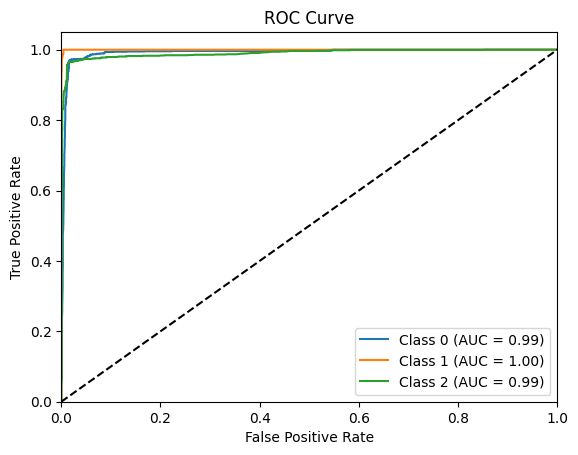

In [ ]:
# Karmaşıklık matrisi
cm = confusion_matrix(true_labels, pred_labels)
print("Confusion Matrix:")
print(cm)

# ROC Eğrisi ve AUC Değeri
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(true_labels, predictions.predictions[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC Eğrisi çizme
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import time


In [ ]:
# Veriyi yükleme ve hazırlama
df = pd.read_csv('balanced_google_play_reviews.csv')  # Veri dosyanızın yolunu buraya ekleyin

# İstenen dengeyi sağlamak için pozitif, negatif ve nötr yorumları filtreleme
positive_df = df[df['sentiment'] == 'positive'].sample(7000, random_state=42)
negative_df = df[df['sentiment'] == 'negative'].sample(7000, random_state=42)
neutral_df = df[df['sentiment'] == 'neutral'].sample(6000, random_state=42)

# Verileri birleştirerek dengeli bir veri seti oluşturma
balanced_df = pd.concat([positive_df, negative_df, neutral_df]).sample(frac=1, random_state=42).reset_index(drop=True)

# Eğitim ve test setlerine bölme
train_df, test_df = train_test_split(balanced_df, test_size=0.2, stratify=balanced_df['sentiment'])

class SentimentDataset(Dataset):
    def __init__(self, df):
        self.df = df
        self.labels = {'negative': 0, 'neutral': 1, 'positive': 2}

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        text = self.df.iloc[idx]['content']
        label = self.df.iloc[idx]['sentiment']
        encodings = tokenizer(text, padding="max_length", truncation=True, max_length=128, return_tensors="pt")
        encodings = {key: tensor.squeeze(0) for key, tensor in encodings.items()}
        encodings['labels'] = torch.tensor(self.labels[label])
        return encodings

# DataLoader oluşturma
train_dataset = SentimentDataset(train_df)
test_dataset = SentimentDataset(test_df)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)


In [ ]:
# DistilBERT tokenizer ve modelini yükleyin
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Eğitim argümanlarını ayarlayın
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    save_steps=2000,
    save_total_limit=2,
    load_best_model_at_end=True,
    eval_strategy="steps",
    eval_steps=500,
    run_name="distilbert_sentiment_analysis",
    fp16=True
)

# Trainer nesnesini oluşturun
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Modeli eğitin
trainer.train()


Step,Training Loss,Validation Loss
500,0.826500,0.629820
1000,0.404000,0.293893
1500,0.264500,0.222937
2000,0.172800,0.138285
2500,0.113300,0.161308
3000,0.110900,0.137987
3500,0.065800,0.148970
4000,0.061800,0.138732
4500,0.029300,0.163403
5000,0.031100,0.153804


Could not locate the best model at ./results/checkpoint-3000/pytorch_model.bin, if you are running a distributed training on multiple nodes, you should activate `--save_on_each_node`.


TrainOutput(global_step=5000, training_loss=0.20799595527648926, metrics={'train_runtime': 514.0756, 'train_samples_per_second': 155.619, 'train_steps_per_second': 9.726, 'total_flos': 2649395220480000.0, 'train_loss': 0.20799595527648926, 'epoch': 5.0})

In [ ]:
# Test verisetinde tahmin yapma
predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=-1)

# Gerçek etiketleri ve tahmin edilen etiketleri alın
true_labels = test_df['sentiment'].apply(lambda x: {'negative': 0, 'neutral': 1, 'positive': 2}[x]).values
pred_labels = preds

# Doğruluk oranını hesaplayın
accuracy = accuracy_score(true_labels, pred_labels)
print(f"Accuracy: {accuracy}")

# Ayrıntılı sınıflandırma raporu alın
report = classification_report(true_labels, pred_labels, target_names=['negative', 'neutral', 'positive'])
print(report)


Accuracy: 0.9715
              precision    recall  f1-score   support

    negative       0.96      0.97      0.96      1400
     neutral       0.99      1.00      0.99      1200
    positive       0.97      0.95      0.96      1400

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000



Confusion Matrix:
[[1352    5   43]
 [   0 1200    0]
 [  55   11 1334]]


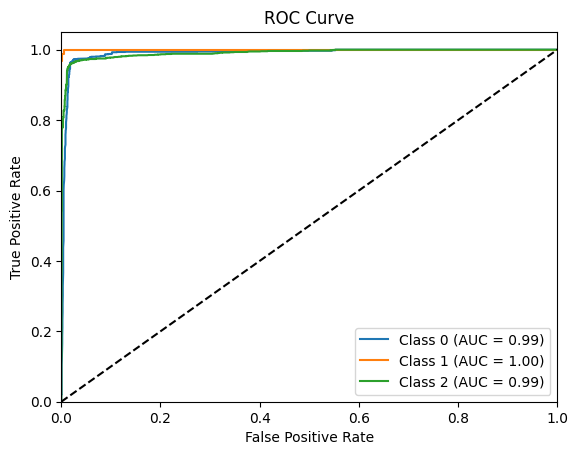

In [ ]:
# Karmaşıklık matrisi
cm = confusion_matrix(true_labels, pred_labels)
print("Confusion Matrix:")
print(cm)

# ROC Eğrisi ve AUC Değeri
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(true_labels, predictions.predictions[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC Eğrisi çizme
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
print("Eğitim seti sınıf dağılımı:")
print(train_df['sentiment'].value_counts())

print("\nTest seti sınıf dağılımı:")
print(test_df['sentiment'].value_counts())


Eğitim seti sınıf dağılımı:
sentiment
negative    5600
positive    5600
neutral     4800
Name: count, dtype: int64

Test seti sınıf dağılımı:
sentiment
negative    1400
positive    1400
neutral     1200
Name: count, dtype: int64


In [ ]:
print("Eğitim setinden örnekler:")
print(train_df.head())

print("\nTest setinden örnekler:")
print(test_df.head())


Eğitim setinden örnekler:
                                                 content  score sentiment
4236   Bonus parapuanlarimizidada kullanabiksek daha ...      3   neutral
14895  Asistanlarınızı değiştirin artık, protokolleri...      3   neutral
13648  Aklınız varsa migros yemek'i kullanmayın. Kury...      1  negative
10466  Migroscuydum ama artik vazgectim 2 urun al bir...      2  negative
17164  Tek bir sipariş verildi ve silindi. 750 tlye 5...      2  negative

Test setinden örnekler:
                                                 content  score sentiment
746    Bonus parapuanlarimizidada kullanabiksek daha ...      3   neutral
15296  B.Çekmece Little Caesars'tan 2 orta boy pizza ...      1  negative
11328                                          Gayet iyi      5  positive
10438                                  uygulama çok kötü      2  negative
9748   İyide açılmıyor uygulama dalga mı geçiyorsunuz...      1  negative


In [ ]:
duplicate_train = train_df.duplicated(subset=['content']).sum()
duplicate_test = test_df.duplicated(subset=['content']).sum()

print(f"Eğitim setinde {duplicate_train} adet tekrar eden yorum var.")
print(f"Test setinde {duplicate_test} adet tekrar eden yorum var.")


Eğitim setinde 8621 adet tekrar eden yorum var.
Test setinde 1448 adet tekrar eden yorum var.


In [ ]:
# Access the training loss from the correct step in the log history.
# Since the last step could be evaluation, and the one before that could be saving,
# we iterate through the history to find a step with the "loss" key.
train_loss = None
for log_entry in reversed(trainer.state.log_history):
    if 'loss' in log_entry:
        train_loss = log_entry['loss']
        break

# Access the evaluation loss, it should be present in the last log entry
# if the last step was an evaluation step.
eval_loss = trainer.state.log_history[-1].get('eval_loss', None)

print(f"Eğitim kaybı: {train_loss}")
print(f"Test kaybı: {eval_loss}")

Eğitim kaybı: 0.0118
Test kaybı: None
